<a href="https://colab.research.google.com/github/ndegwaanth/house-price-prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
!pip install tensorflow

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import tensorflow as ts
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.compose import ColumnTransformer

In [250]:
df = pd.read_excel("/content/HousePricePrediction.xlsx")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [251]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [252]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [253]:
df['SalePrice'] = df[['SalePrice']].fillna(df['SalePrice'].mean())

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [256]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [255]:
df.tail()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,180921.19589


In [257]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [208]:
df[['TotalBsmtSF', 'BsmtFinSF2']] = df[['TotalBsmtSF', 'BsmtFinSF2']].fillna(df[['TotalBsmtSF', 'BsmtFinSF2']].mean())

In [258]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])

In [259]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [260]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [212]:
for col in df.columns:
  print(f"Column: {col}")
  print(f"{col}: {df.value_counts()} \n")
  print("#" * 150)

Column: Id
Id: Id    MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice   
2918  60          RL        9627     Inside     1Fam      5            1993       1994          HdBoard      0.0         996.0        180921.19589    1
0     60          RL        8450     Inside     1Fam      5            2003       2003          VinylSd      0.0         856.0        208500.00000    1
1     20          RL        9600     FR2        1Fam      8            1976       1976          MetalSd      0.0         1262.0       181500.00000    1
2     60          RL        11250    Inside     1Fam      5            2001       2002          VinylSd      0.0         920.0        223500.00000    1
3     70          RL        9550     Corner     1Fam      5            1915       1970          Wd Sdng      0.0         756.0        140000.00000    1
                                                                              

In [261]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st'], dtype='object')

In [262]:
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [263]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [264]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2427 entries, 3 to 1426
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1428 non-null   float64
 1   MSSubClass           1428 non-null   float64
 2   LotArea              1428 non-null   float64
 3   OverallCond          1428 non-null   float64
 4   YearBuilt            1428 non-null   float64
 5   YearRemodAdd         1428 non-null   float64
 6   BsmtFinSF2           1428 non-null   float64
 7   TotalBsmtSF          1428 non-null   float64
 8   SalePrice            1428 non-null   float64
 9   MSZoning_C (all)     1428 non-null   float64
 10  MSZoning_FV          1428 non-null   float64
 11  MSZoning_RH          1428 non-null   float64
 12  MSZoning_RL          1428 non-null   float64
 13  MSZoning_RM          1428 non-null   float64
 14  LotConfig_Corner     1428 non-null   float64
 15  LotConfig_CulDSac    1428 non-null   float6

In [266]:
# Fill NA(S) with mean only in numerical columns
for col in df.select_dtypes(include=np.number).columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   object 
 10  BsmtFinSF2    2919 non-null   float64
 11  TotalBsmtSF   2919 non-null   float64
 12  SalePrice     2919 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [268]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0


In [269]:
# Duplicates
df.duplicated().sum()

0

In [270]:
# Outlier
Q1 = df[numerical_cols].quantile(0.25)
Q2 = df[numerical_cols].quantile(0.50)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound))
df = df[~outliers.any(axis=1)]
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
12,12,20,RL,12968,Inside,1Fam,6,1962,1962,HdBoard,0.0,912.0,144000.0
14,14,20,RL,10920,Corner,1Fam,5,1960,1960,MetalSd,0.0,1253.0,157000.0
16,16,20,RL,11241,CulDSac,1Fam,7,1970,1970,Wd Sdng,0.0,1004.0,149000.0


In [271]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

## Exploratory Data Analysis (EDA)

In [272]:
# Shape
df.shape

(1428, 13)

In [273]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.0,1428.000000,1428.000000
mean,1734.411064,51.799720,9484.897059,5.457283,1976.980392,1986.070028,0.0,1082.475490,177294.005417
std,791.786915,31.173888,2857.165139,0.754521,28.572060,20.547533,0.0,342.203253,12587.259418
min,3.000000,20.000000,2104.000000,4.000000,1890.000000,1950.000000,0.0,160.000000,136500.000000
25%,1192.000000,20.000000,7789.000000,5.000000,1958.000000,1967.000000,0.0,840.000000,180921.195890
50%,1863.500000,50.000000,9378.500000,5.000000,1984.000000,1995.000000,0.0,1042.500000,180921.195890
75%,2360.500000,60.000000,11208.750000,6.000000,2003.000000,2004.000000,0.0,1314.000000,180921.195890
max,2918.000000,120.000000,17600.000000,7.000000,2010.000000,2010.000000,0.0,2036.000000,207500.000000


In [274]:
# Skewness
df[numerical_cols].skew()

,0
Id,-0.515118
MSSubClass,0.712765
LotArea,0.135412
OverallCond,0.973633
YearBuilt,-0.754980
YearRemodAdd,-0.606412
BsmtFinSF2,0.000000
TotalBsmtSF,0.334751
SalePrice,-1.545863


In [275]:
# Kurtosis
df[numerical_cols].kurtosis()

,0
Id,-0.742888
MSSubClass,-0.312190
LotArea,0.175259
OverallCond,-0.124627
YearBuilt,-0.450837
YearRemodAdd,-1.183479
BsmtFinSF2,0.000000
TotalBsmtSF,-0.213859
SalePrice,2.769707


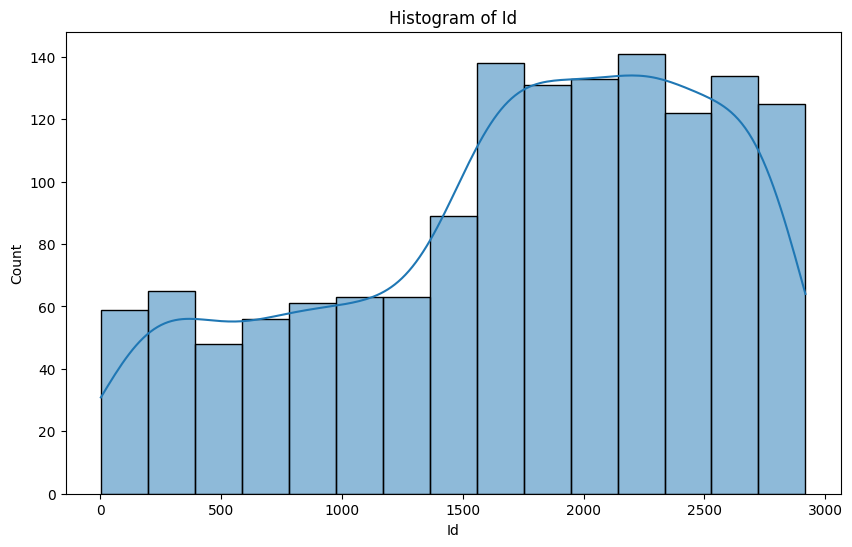

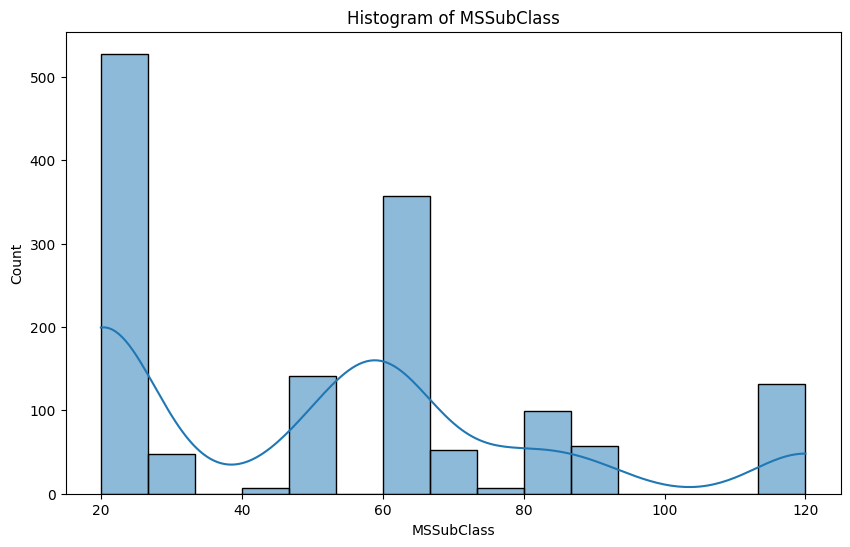

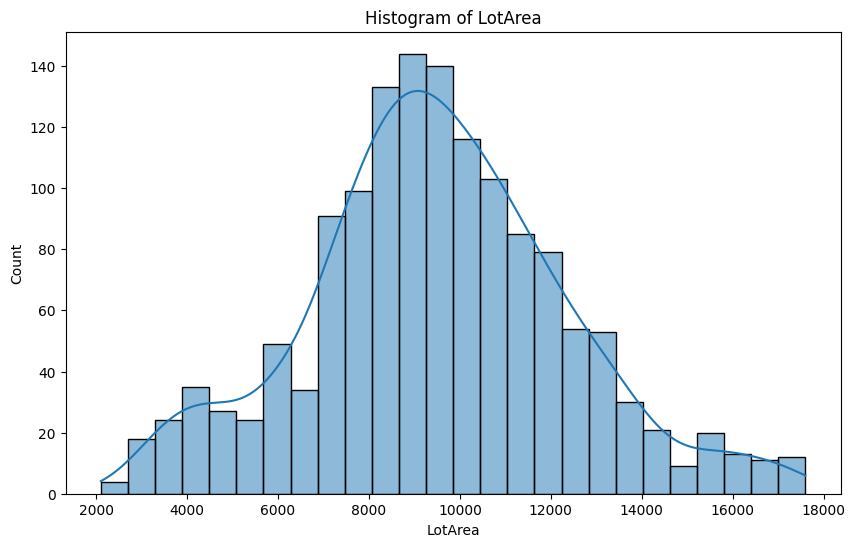

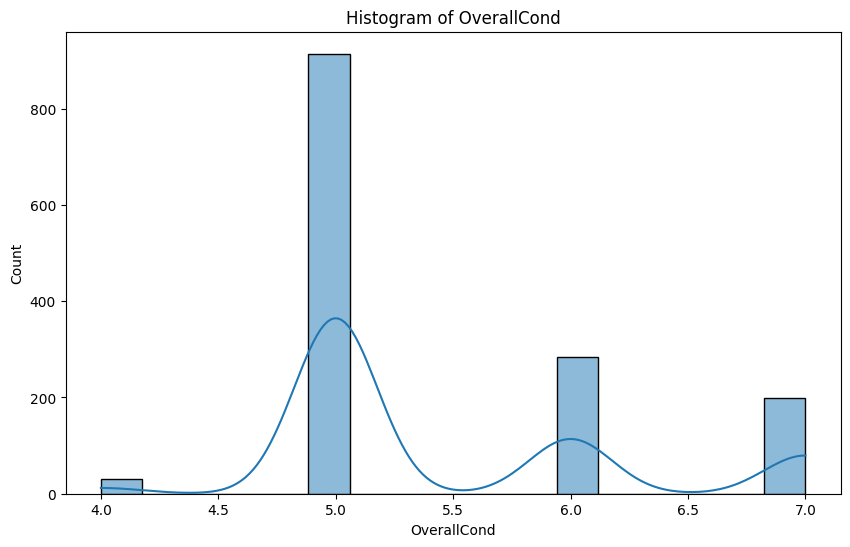

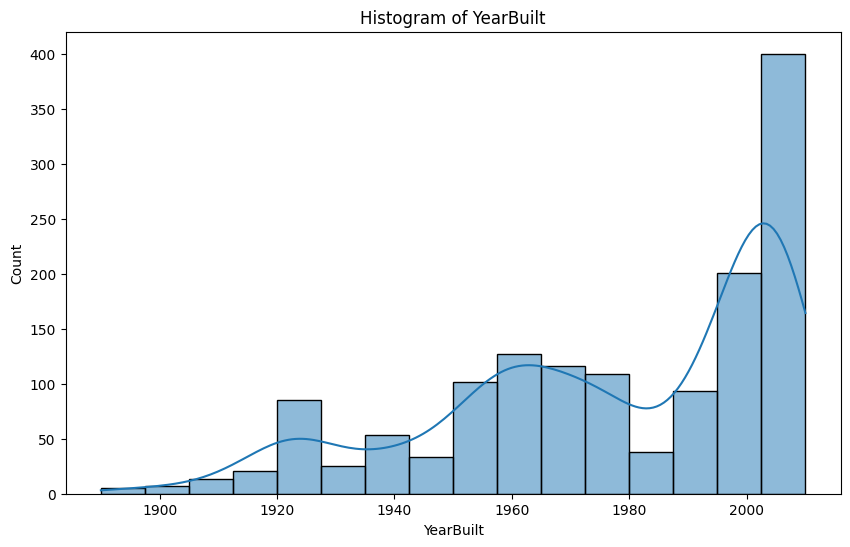

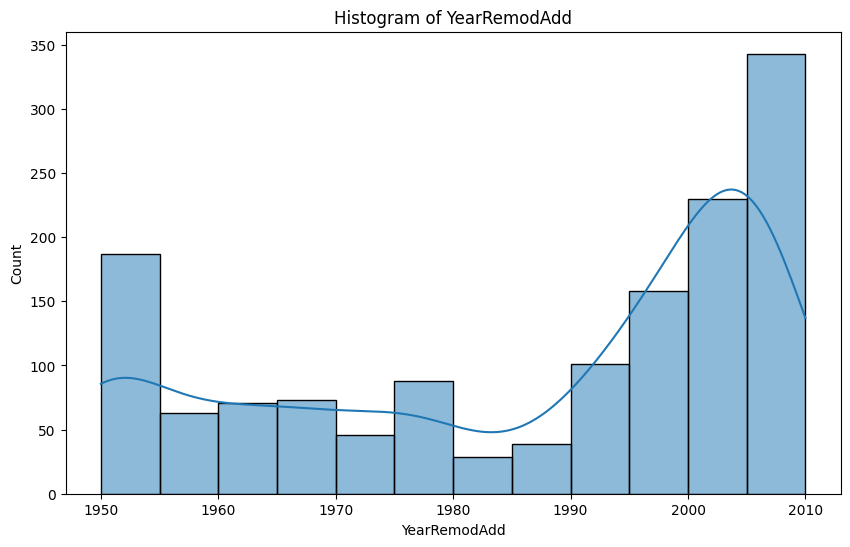

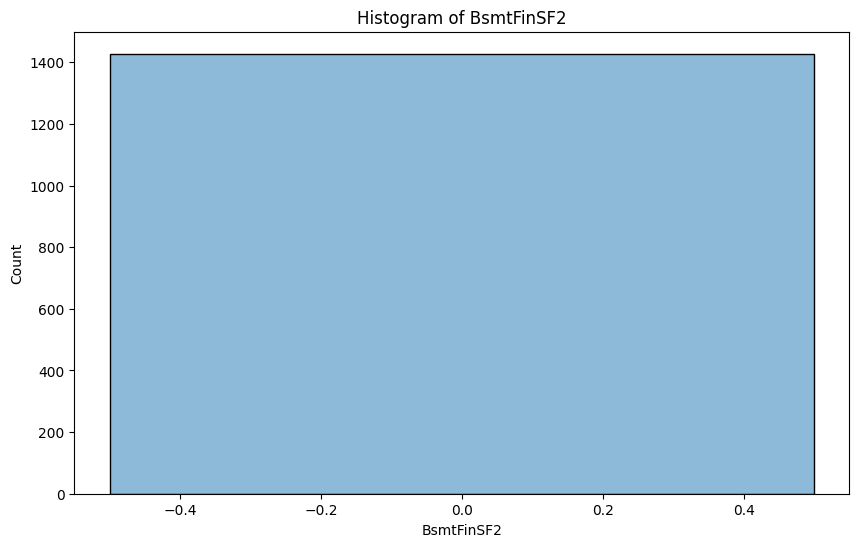

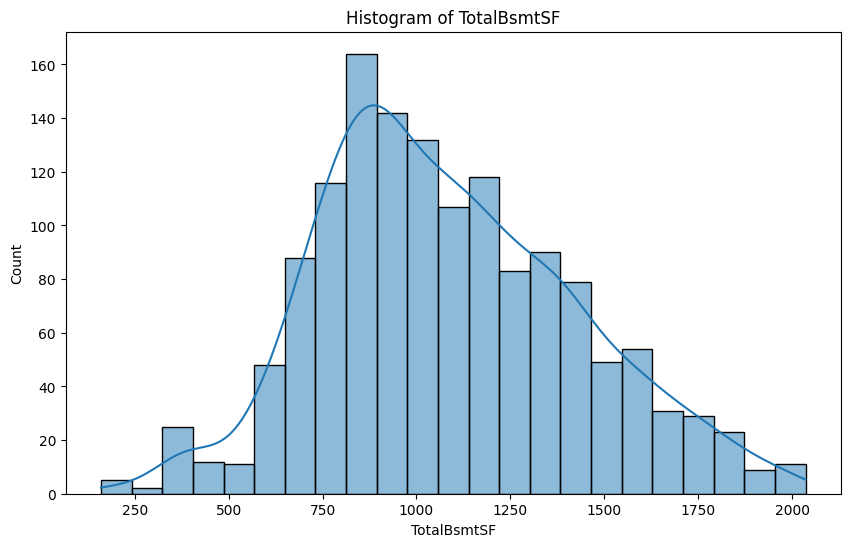

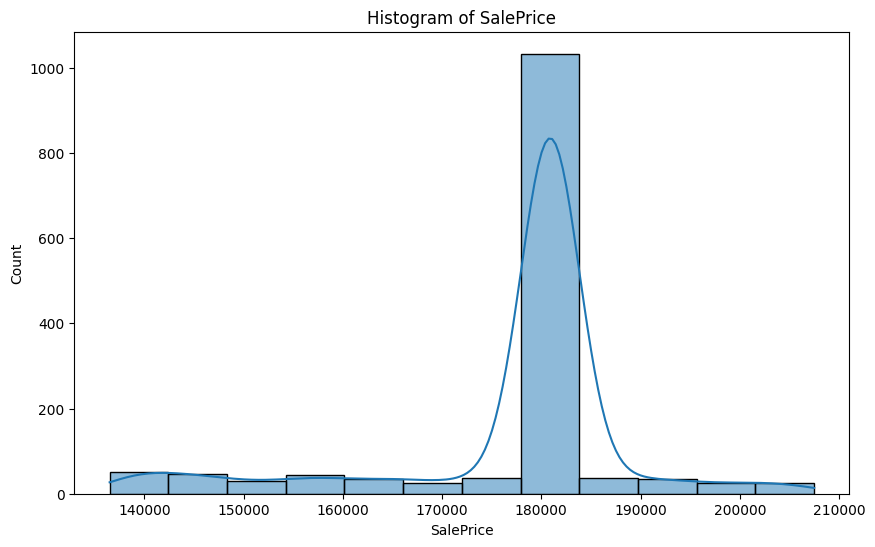

In [276]:
# Histogram
for col in numerical_cols:
  plt.figure(figsize=(10,6))
  sns.histplot(df[col], kde=True)
  plt.title(f"Histogram of {col}")
  plt.show()

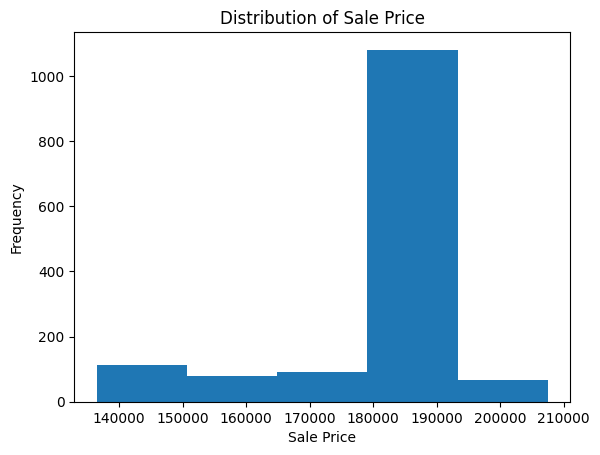

In [277]:
plt.hist(df['SalePrice'], bins=5)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.show()

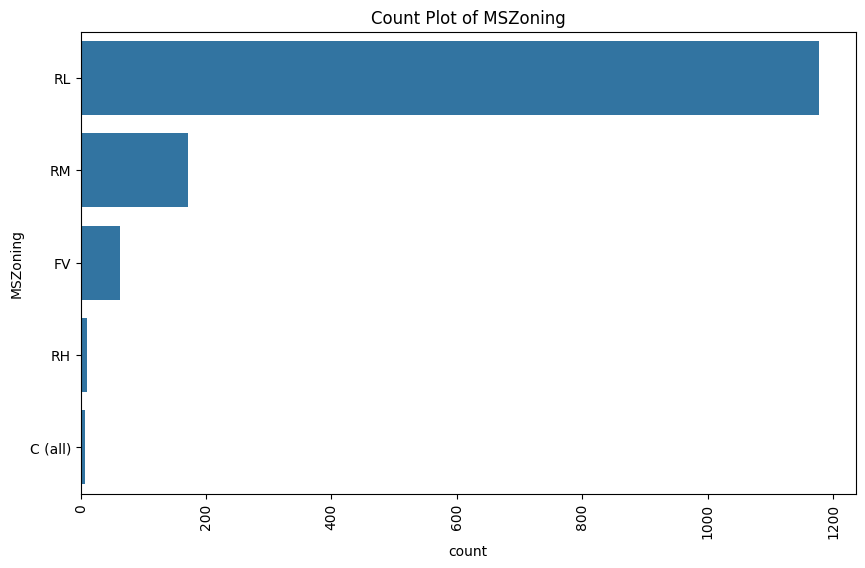

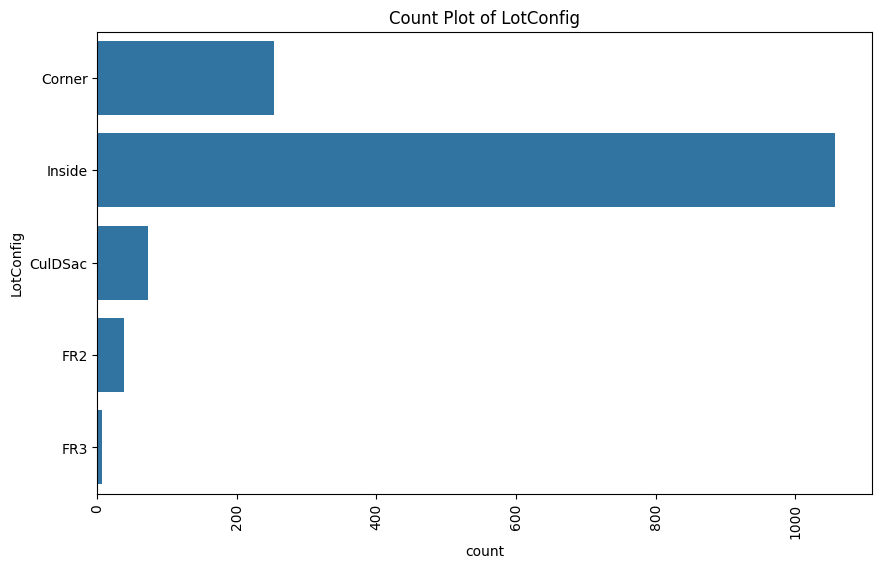

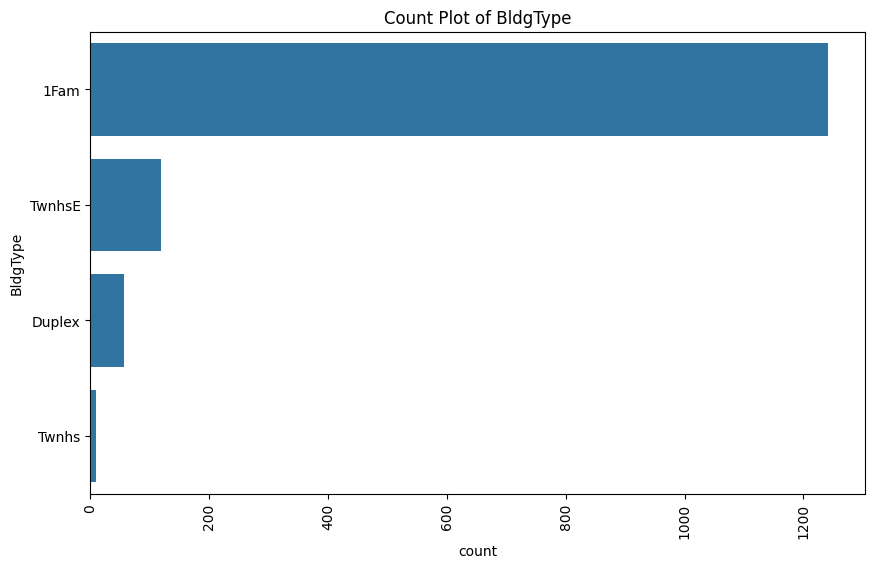

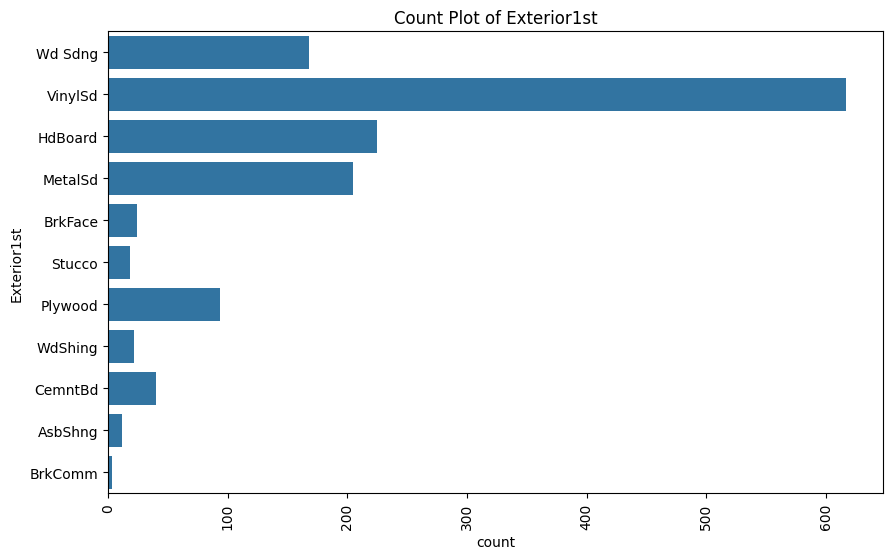

In [278]:
for col in categorical_cols:
  plt.figure(figsize=(10,6))
  sns.countplot(df[col])
  plt.title(f"Count Plot of {col}")
  plt.xticks(rotation=90)
  plt.show()

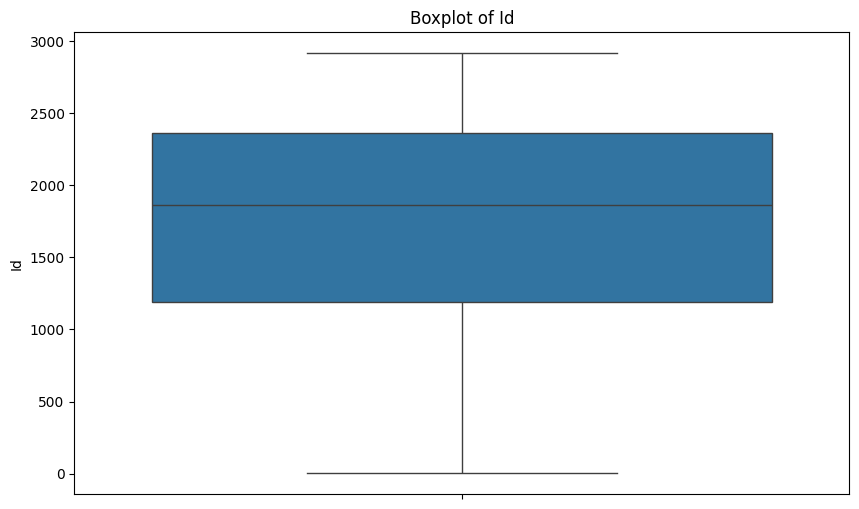

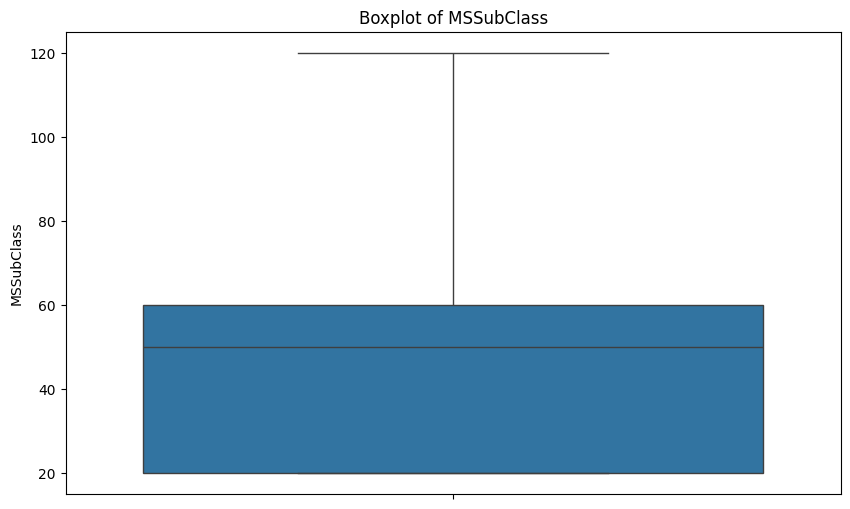

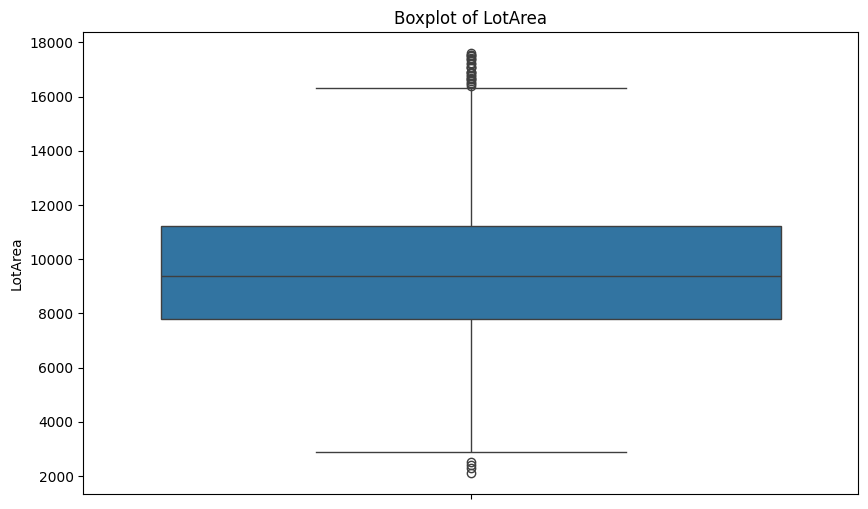

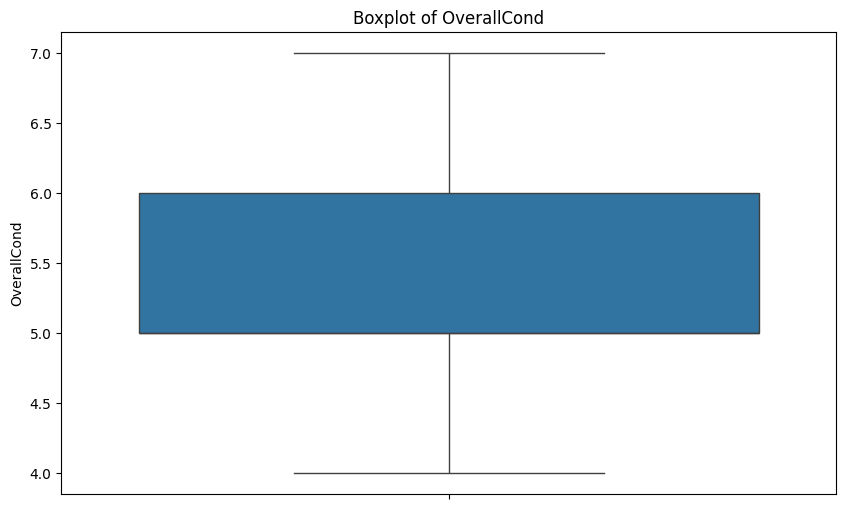

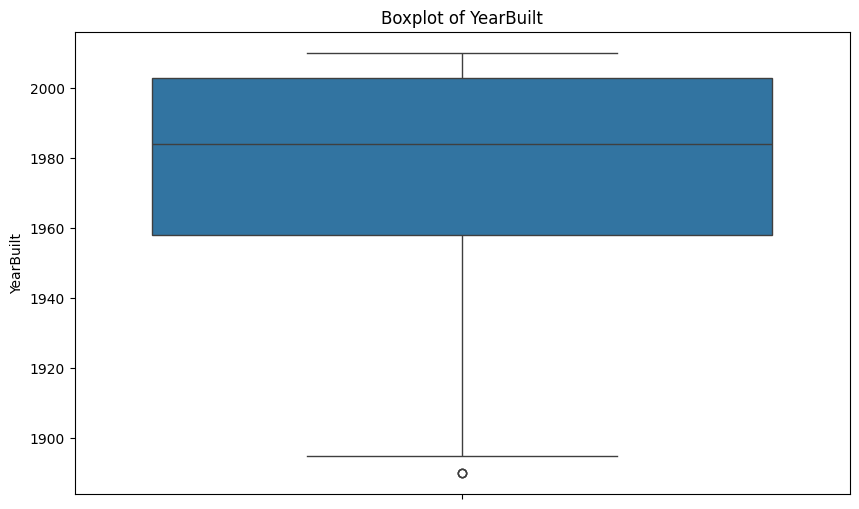

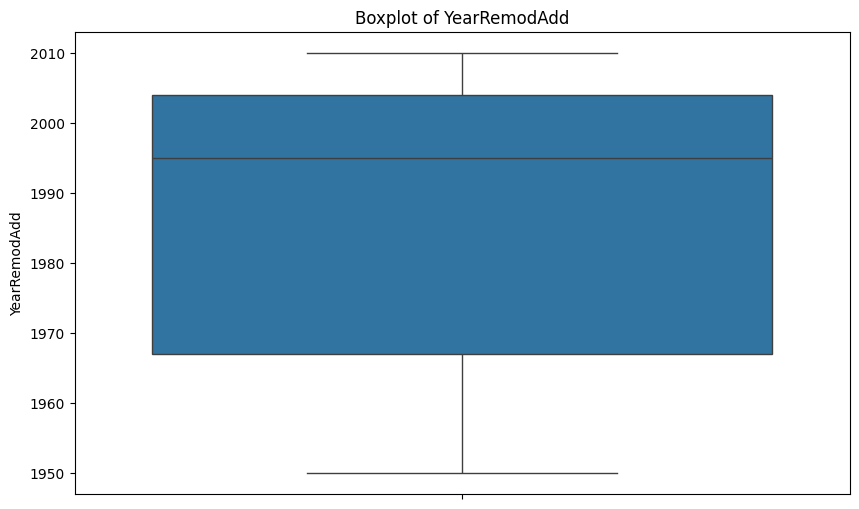

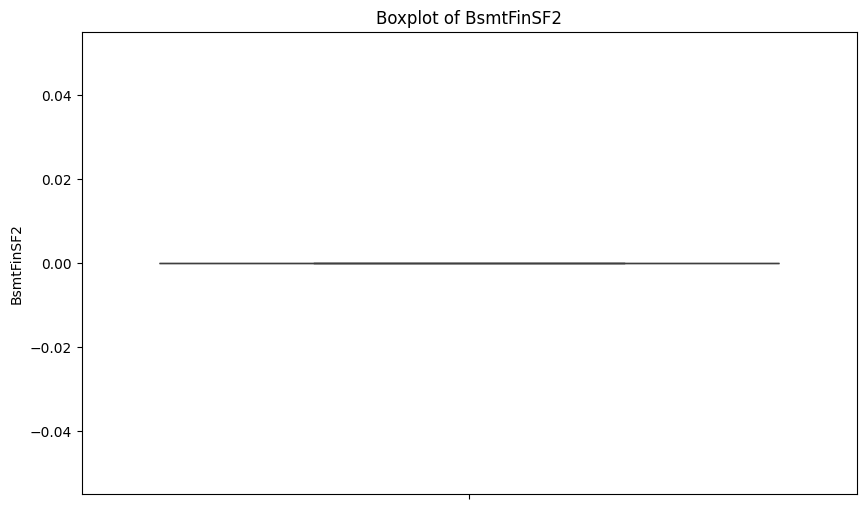

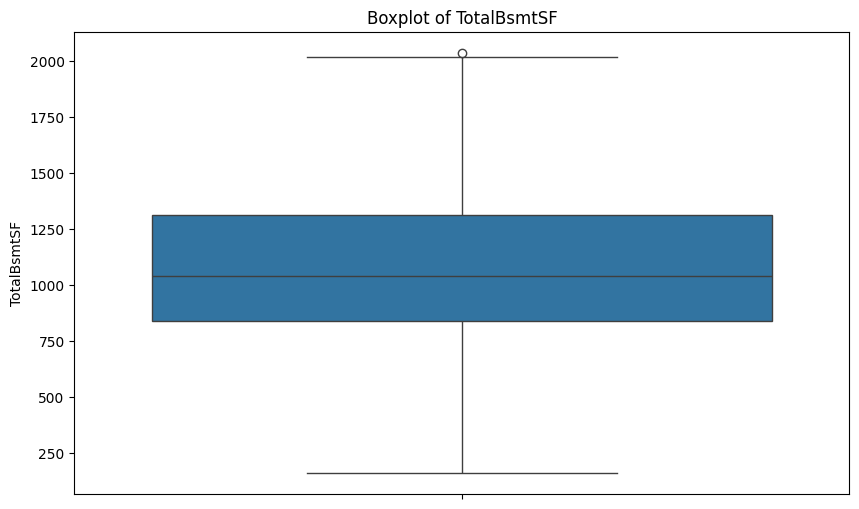

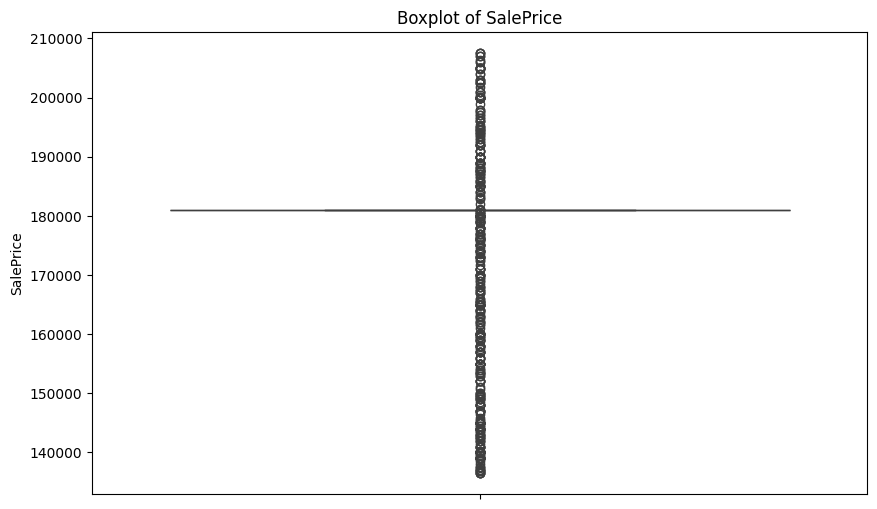

In [279]:
# Boxplot
for col in numerical_cols:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

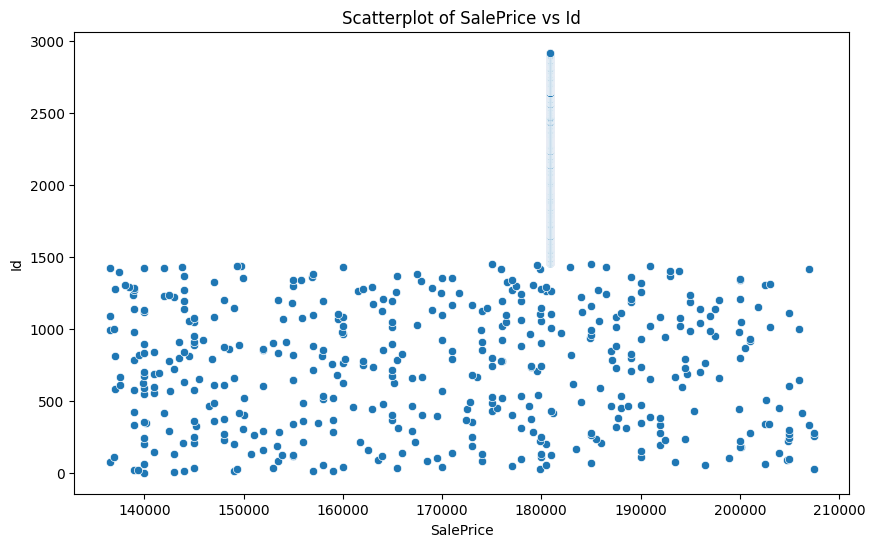

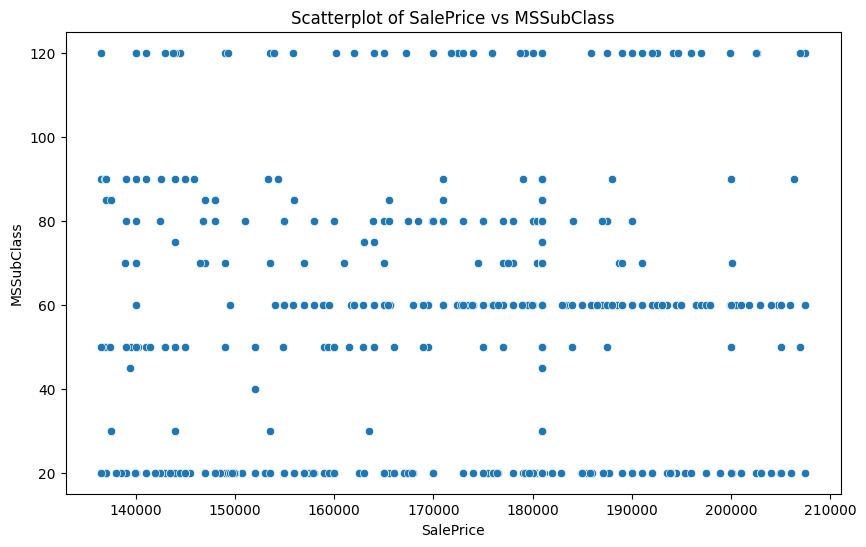

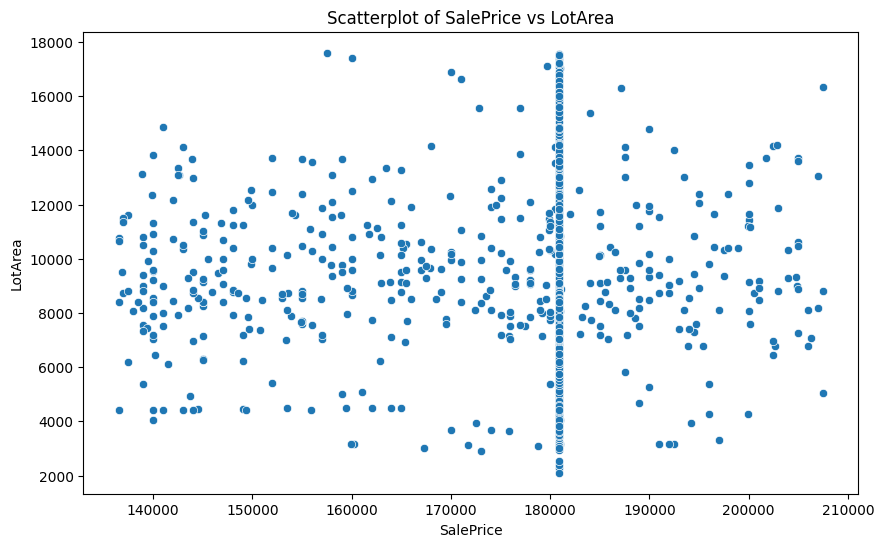

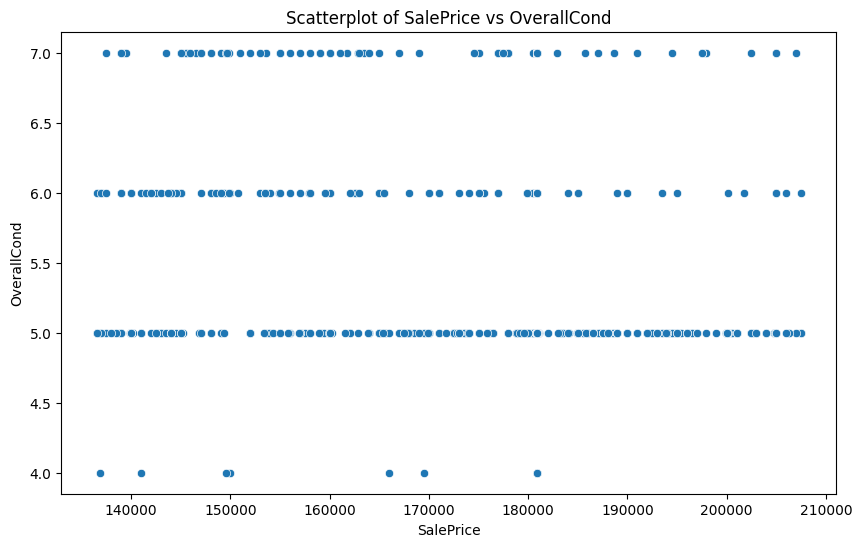

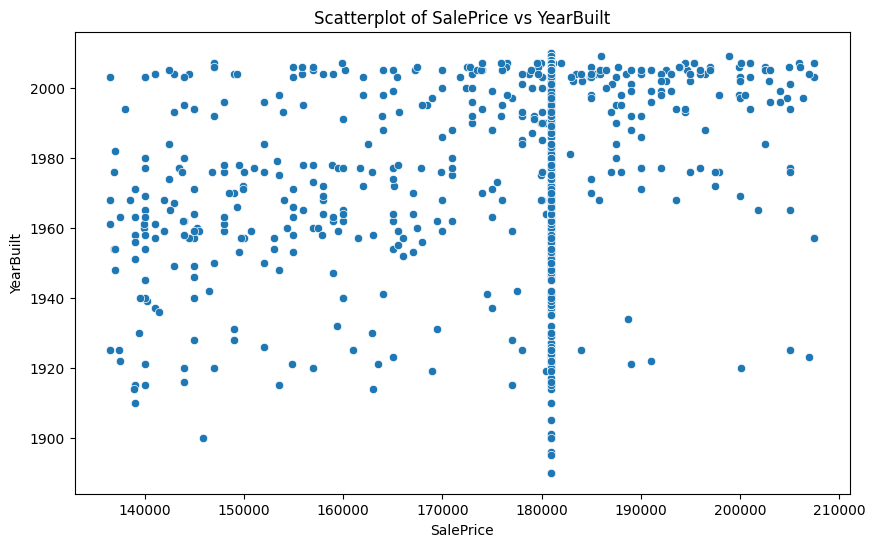

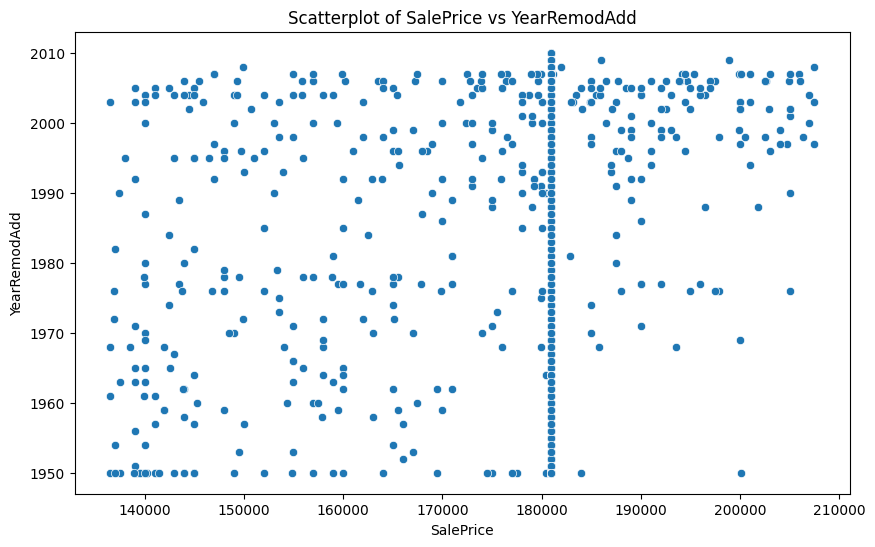

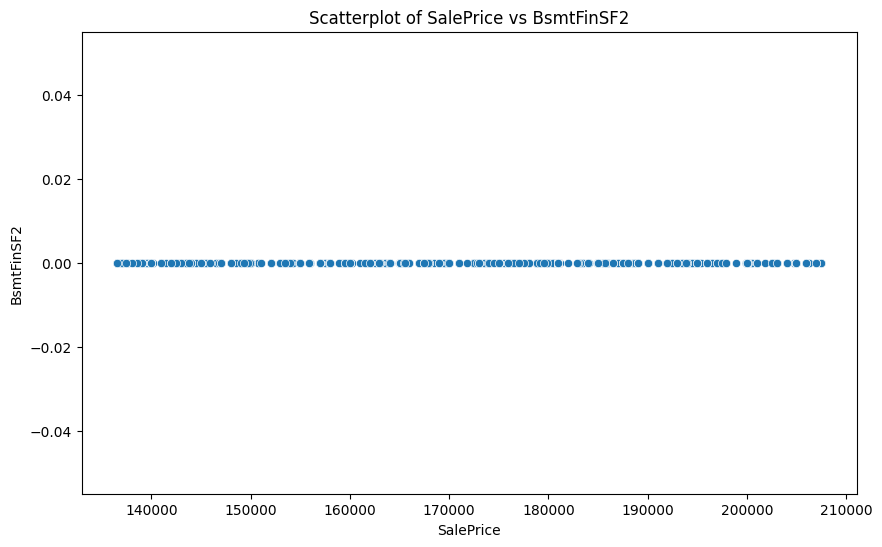

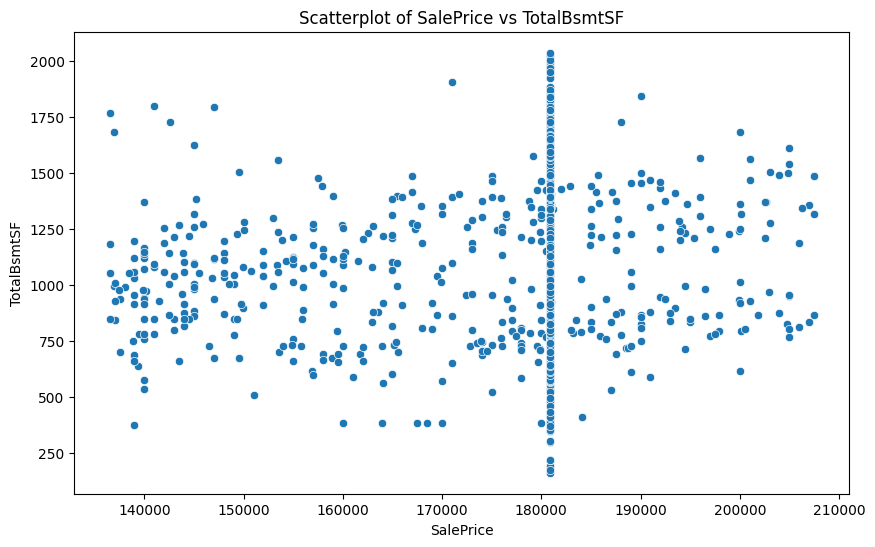

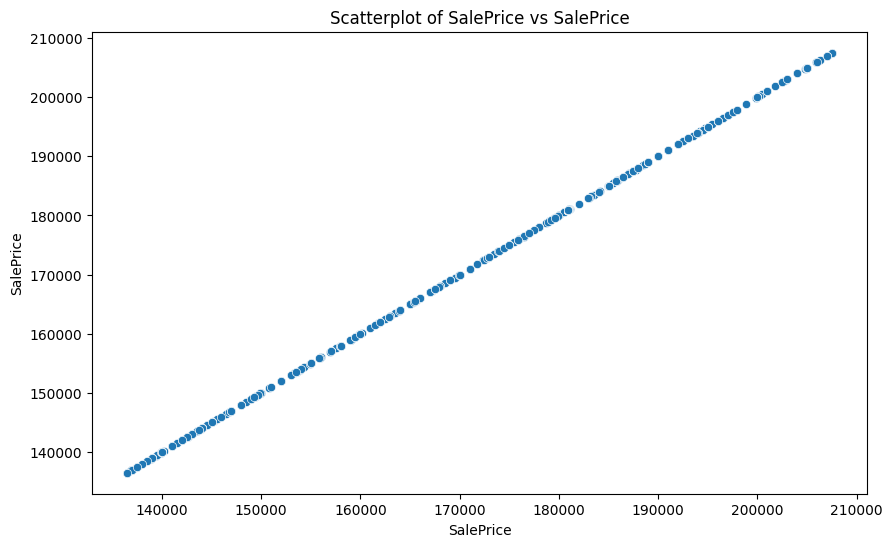

In [232]:
# Scatterplot
for col in numerical_cols:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x='SalePrice', y=col, data=df)
  plt.title(f"Scatterplot of SalePrice vs {col}")
  plt.show()

In [309]:
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

KeyError: "['SalePrice'] not found in axis"

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
X.shape

(1428, 12)

In [283]:
y.shape

(1428,)

In [284]:
X.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0
12,12,20,RL,12968,Inside,1Fam,6,1962,1962,HdBoard,0.0,912.0
14,14,20,RL,10920,Corner,1Fam,5,1960,1960,MetalSd,0.0,1253.0
16,16,20,RL,11241,CulDSac,1Fam,7,1970,1970,Wd Sdng,0.0,1004.0


In [293]:
# Apply the preprocessing pipeline to the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [241]:
X.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0
12,12,20,RL,12968,Inside,1Fam,6,1962,1962,HdBoard,0.0,912.0
14,14,20,RL,10920,Corner,1Fam,5,1960,1960,MetalSd,0.0,1253.0
16,16,20,RL,11241,CulDSac,1Fam,7,1970,1970,Wd Sdng,0.0,1004.0


In [242]:
y.isnull().sum()

0

In [299]:
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)) # Use .values to get the numpy array before reshape
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)) # Use .values to get the numpy array before reshape

In [300]:
## Building ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

model.add(Dropout(0.2))  # Drop 20% of neurons randomly

In [301]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae', 'accuracy'])

In [302]:
# Training the model
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=20, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.0031 - loss: 0.5110 - mae: 0.6809 - val_accuracy: 0.0035 - val_loss: 0.2643 - val_mae: 0.4843
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0058 - loss: 0.2284 - mae: 0.4326 - val_accuracy: 0.0035 - val_loss: 0.1088 - val_mae: 0.2986
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0035 - loss: 0.1265 - mae: 0.2901 - val_accuracy: 0.0035 - val_loss: 0.0558 - val_mae: 0.2036
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0096 - loss: 0.1059 - mae: 0.2431 - val_accuracy: 0.0035 - val_loss: 0.0446 - val_mae: 0.1779
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0048 - loss: 0.1077 - mae: 0.2401 - val_accuracy: 0.0035 - val_loss: 0.0425 - val_mae: 0.1744
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0042 - loss: 0.0929 - mae: 0.2182 - val_accuracy: 0.0035 - val_loss: 0.0411 - val_mae: 0.1717
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

In [ ]:
# Prediction of the future salesprice
y_pred = model.predict(X_test)